# Patch Duration vs. Morphological Calls(63x) per Post Patch Outcomes

##### Date: 4/26/18 Updated 63x.csv, shiny.csv & patch_seq_log_mouse.csv

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from IPython.display import display #Found this to display all columns in a table

sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

##### postpatch_func.py by Rusty from Stash 

In [2]:
def nucleated(x):
    nuc_high_seal = x[(x['anno.postPatch_label'] == 'Nucleated') | 
                      (((x['anno.postPatch_label'] == 'nucleus_visible') | 
                      (x['anno.postPatch_label'] == 'nucleus_present')) & 
                      (x['anno.endPipetteR_label'] >= 500))]
    return nuc_high_seal

def partial_nucleated(y):
    nuc_low_seal = y[(y['anno.postPatch_label'] == 'Partial-Nucleus') | 
                     (((y['anno.postPatch_label'] == 'nucleus_present') | 
                     (y['anno.postPatch_label'] == 'nucleus_visible')) & 
                     (y["anno.endPipetteR_label"] <= 499))]
    return nuc_low_seal

def outside_out(z):
    no_high_seal = z[(z['anno.postPatch_label'] == 'Outside-Out') | 
                     (((z['anno.postPatch_label'] == 'nucleus_absent') | 
                     (z['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                     (z['anno.endPipetteR_label'] >= 500))]
    return no_high_seal

def no_seal(w): 
    no_low_seal = w[(w['anno.postPatch_label'] == 'No-Seal') | 
                    (((w['anno.postPatch_label'] == 'nucleus_absent') | 
                    (w['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                    (w['anno.endPipetteR_label'] <= 499))]
    return no_low_seal
    
def entire_cell(v):
    entire = v[(v['anno.postPatch_label'] == 'Entire-Cell') | 
               (v['anno.postPatch_label'] == 'entire_cell')]
    return entire

#variable['post_patch'] = 'Term'
#Term is an output displayed in the Post_Patch column

def reclassify(df):
    nu = nucleated(df)
    nu['post_patch'] = 'Nuc-high seal' 
    oo = outside_out(df)
    oo['post_patch'] = 'No-high seal'
    pn = partial_nucleated(df)
    pn['post_patch'] = 'Nuc-low seal'
    ns = no_seal(df)
    ns['post_patch'] = 'No-low seal'
    ec = entire_cell(df)
    ec['post_patch'] = 'Entire cell'
    return  nu, oo, pn, ns, ec

def concat_df(a, b, c, d, e):
    frames = (a, b, c, d, e)
    df = pd.concat(frames)
    return df

def postpatch_reclass(df):
    return concat_df(*reclassify(df))

#final_df = postpatch_reclass(final_df)

##### Reads 63x.csv, shiny.csv & patch_seq_log_mouse.csv

In [3]:
morph_df = pd.read_csv("63x.csv")
shiny_df = pd.read_csv("shiny.csv")
ps_df = pd.read_csv("patch_seq_log_mouse.csv")

##### Creating ps_df from patch_seq_log_mouse.csv

In [4]:
ps_initial = ['Lims tube id',
              'patch duration',
              'Time spent extracting cytosol',
              'Time spent retracting pipette']
ps_df = ps_df[ps_initial]
ps_df.head()

,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P1S4_170104_001_A01,11.78333333,2.3,NaN
1,P1S4_170104_002_A01,12.21666667,2.316666667,NaN
2,P1S4_170104_003_A01,11.78333333,2.45,NaN
3,P1S4_170104_004_A01,12.45,2.316666667,NaN
4,P1S4_170104_005_A01,12.36666667,2.35,NaN


##### Creating shiny_df from shiny.csv

In [5]:
shiny_initial = ['anno.sample_id',
                 'anno.postPatch_label',
                 'anno.endPipetteR_label']
shiny_df = shiny_df[shiny_initial]
shiny_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P1S4_160318_069_A01,O/O,0.0
1,P1S4_160407_108_A01,nucleated patch,0.0
2,P1S4_160407_109_A01,partial nucleus,0.0
3,P1S4_160407_112_A01,o/o,0.0
4,P1S4_160407_113_A01,0,0.0


##### Merging shiny_df with ps_df to create shiny_ps_df

In [6]:
#Left = shiny 
#Right = ps
#Inner merge = contains matched info between shiny and ps

shiny_ps_df = pd.merge(left = shiny_df, 
                         right = ps_df, 
                         left_on = 'anno.sample_id', 
                         right_on = 'Lims tube id', 
                         how = 'inner')

In [7]:
shiny_ps_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P2S4_170301_056_A01,0,0.0,P2S4_170301_056_A01,2.55,0.86666667,NaN
1,P2S4_170301_057_A01,0,0.0,P2S4_170301_057_A01,1.93333333,0.23333333,NaN
2,P2S4_170301_058_A01,0,0.0,P2S4_170301_058_A01,2.48333333,0.41666667,NaN
3,P1S4_170302_001_A01,0,0.0,P1S4_170302_001_A01,3.616666667,2.05,NaN
4,P1S4_170302_002_A01,0,0.0,P1S4_170302_002_A01,3.683333333,2.283333333,NaN


##### Creating morph_df from 63x.csv

In [8]:
morph_initial = ['patched_cell_container',
                 'ims63x_go_no_go',
                 'project']
morph_df = morph_df[morph_initial]
morph_df.tail()

,patched_cell_container,ims63x_go_no_go,project
6461,P2S4_180109_052_A01,NaN,mIVSCC-MET
6462,PAS4_180109_452_A01,NaN,mIVSCC-MET
6463,P8S4_180110_353_A01,NaN,mIVSCC-MET
6464,P8S4_180110_354_A01,63x no go,mIVSCC-MET
6465,PAS4_180110_454_A01,NaN,mIVSCC-MET


##### Merging morph_df with shiny_lims_df to create final_df

In [9]:
#Inner merge = contains only matching data of both morph_df and shiny_LIMS_df

final_df = pd.merge(left = morph_df, 
                    right = shiny_ps_df, 
                    left_on = 'patched_cell_container', 
                    right_on = 'anno.sample_id', 
                    how = 'inner')

In [10]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P8S4_180103_351_A01,NaN,mIVSCC-MET,P8S4_180103_351_A01,nucleus_absent,35.0,P8S4_180103_351_A01,11.46666667,0.916666667,3.2
1,P8S4_180103_352_A01,63x no go,mIVSCC-MET,P8S4_180103_352_A01,nucleus_present,8.5,P8S4_180103_352_A01,10.16666667,1.7,2.5
2,P6S4_170609_253_A01,63x no go,T301x,P6S4_170609_253_A01,Partial-Nucleus,0.0,P6S4_170609_253_A01,5.83333333,2.16666667,NaN
3,P6S4_170609_254_A01,63x no go,T301x,P6S4_170609_254_A01,No-Seal,0.0,P6S4_170609_254_A01,5.78333333,2.08333333,NaN
4,P1S4_170609_001_A01,NaN,T301x,P1S4_170609_001_A01,No-Seal,0.0,P1S4_170609_001_A01,4.416666667,2.75,NaN


##### Info

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2720 entries, 0 to 2719
Data columns (total 10 columns):
patched_cell_container           2720 non-null object
ims63x_go_no_go                  1624 non-null object
project                          2720 non-null object
anno.sample_id                   2720 non-null object
anno.postPatch_label             2712 non-null object
anno.endPipetteR_label           2720 non-null float64
Lims tube id                     2720 non-null object
patch duration                   2688 non-null object
Time spent extracting cytosol    2696 non-null object
Time spent retracting pipette    1571 non-null object
dtypes: float64(1), object(9)
memory usage: 233.8+ KB


##### Creating Date column using patched_cell_container column

In [12]:
final_df['Date'] = final_df['patched_cell_container'].str[5:11]

##### Indexing Date column then sorting by date index

In [13]:
final_df = final_df.set_index('Date')

In [14]:
final_df.sort_index(inplace = True)

In [15]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
170301,P2S4_170301_058_A01,NaN,T301x,P2S4_170301_058_A01,0,0.0,P2S4_170301_058_A01,2.48333333,0.41666667,NaN
170301,P2S4_170301_057_A01,NaN,T301x,P2S4_170301_057_A01,0,0.0,P2S4_170301_057_A01,1.93333333,0.23333333,NaN
170301,P2S4_170301_056_A01,NaN,T301x,P2S4_170301_056_A01,0,0.0,P2S4_170301_056_A01,2.55,0.86666667,NaN
170302,P2S4_170302_052_A01,NaN,T301x,P2S4_170302_052_A01,0,0.0,P2S4_170302_052_A01,3.11666667,1.83333333,NaN
170302,P1S4_170302_010_A01,NaN,T301x,P1S4_170302_010_A01,0,0.0,P1S4_170302_010_A01,3.033333333,1.833333333,NaN


In [16]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
180319,P8S4_180319_353_A01,NaN,mIVSCC-MET,P8S4_180319_353_A01,nucleus_present,500.0,P8S4_180319_353_A01,12.45,1.25,1.7
180319,PAS4_180319_452_A01,NaN,mIVSCC-MET,PAS4_180319_452_A01,nucleus_present,1600.0,PAS4_180319_452_A01,8.616666667,0.75,1.9
180319,PBS4_180319_504_A01,NaN,mIVSCC-MET,PBS4_180319_504_A01,nucleus_present,2000.0,PBS4_180319_504_A01,17.76666667,1.05,1.016666667
180319,P1S4_180319_005_A01,NaN,mIVSCC-MET,P1S4_180319_005_A01,nucleus_present,1000.0,P1S4_180319_005_A01,7.016666667,0.583333333,1.4
180319,P8S4_180319_352_A01,NaN,mIVSCC-MET,P8S4_180319_352_A01,nucleus_present,2000.0,P8S4_180319_352_A01,7.816666667,0.6,1.6


##### final_df start at production date to present date

In [17]:
final_df = final_df['170901':]

In [18]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
170901,P8S4_170901_354_A01,63x no go,T301x,P8S4_170901_354_A01,No-Seal,0.0,P8S4_170901_354_A01,9.46666667,0.8,NaN
170901,P8S4_170901_352_A01,63x no go,T301x,P8S4_170901_352_A01,Nucleated,0.0,P8S4_170901_352_A01,11.3166667,1.7,NaN
170901,P2S4_170901_051_A01,63x go,T301x,P2S4_170901_051_A01,Nucleated,0.0,P2S4_170901_051_A01,9.96666667,0.85,NaN
170901,P8S4_170901_353_A01,63x no go,T301x,P8S4_170901_353_A01,No-Seal,0.0,P8S4_170901_353_A01,10.1,0.2,NaN
170901,P2S4_170901_054_A01,63x go,T301x,P2S4_170901_054_A01,Partial-Nucleus,0.0,P2S4_170901_054_A01,12.2,1.03333333,NaN


In [19]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
180319,P8S4_180319_353_A01,NaN,mIVSCC-MET,P8S4_180319_353_A01,nucleus_present,500.0,P8S4_180319_353_A01,12.45,1.25,1.7
180319,PAS4_180319_452_A01,NaN,mIVSCC-MET,PAS4_180319_452_A01,nucleus_present,1600.0,PAS4_180319_452_A01,8.616666667,0.75,1.9
180319,PBS4_180319_504_A01,NaN,mIVSCC-MET,PBS4_180319_504_A01,nucleus_present,2000.0,PBS4_180319_504_A01,17.76666667,1.05,1.016666667
180319,P1S4_180319_005_A01,NaN,mIVSCC-MET,P1S4_180319_005_A01,nucleus_present,1000.0,P1S4_180319_005_A01,7.016666667,0.583333333,1.4
180319,P8S4_180319_352_A01,NaN,mIVSCC-MET,P8S4_180319_352_A01,nucleus_present,2000.0,P8S4_180319_352_A01,7.816666667,0.6,1.6


##### Renaming Columns

In [20]:
final_df.rename(columns = {'ims63x_go_no_go' : 'morph',
                           'patch duration' : 'patch_dur', 
                           'Time spent extracting cytosol' : 'ext_dur',
                           'Time spent retracting pipette' : 'ret_dur'}, inplace = True)

##### Adding post_patch column to the end of final_df

In [21]:
final_df = postpatch_reclass(final_df)
final_df.tail()

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,patched_cell_container,morph,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch_dur,ext_dur,ret_dur,post_patch
Date,,,,,,,,,,,
180205,P1S4_180205_003_A01,63x no go,mIVSCC-MET,P1S4_180205_003_A01,entire_cell,5.0,P1S4_180205_003_A01,5.983333333,0.566666667,1.216666667,Entire cell
180207,P1S4_180207_003_A01,63x no go,mIVSCC-MET,P1S4_180207_003_A01,entire_cell,3.0,P1S4_180207_003_A01,4.816666667,0.433333333,0.933333333,Entire cell
180220,PAS4_180220_451_A01,63x no go,mIVSCC-MET,PAS4_180220_451_A01,entire_cell,5.7,PAS4_180220_451_A01,8.633333333,1.6,0.533333333,Entire cell
180226,PAS4_180226_451_A01,NaN,mIVSCC-MET,PAS4_180226_451_A01,entire_cell,7.3,PAS4_180226_451_A01,9.466666667,1.1,3.283333333,Entire cell
180313,PBS4_180313_503_A01,NaN,mIVSCC-MET,PBS4_180313_503_A01,entire_cell,100.0,PBS4_180313_503_A01,20.16666667,0.016666667,0,Entire cell


##### Dropping columns 

In [22]:
final_df.drop(['patched_cell_container', 'project', 'anno.sample_id', 'Lims tube id', 'ext_dur', 'ret_dur'], 
              axis=1, inplace=True)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 170901 to 180313
Data columns (total 5 columns):
morph                     992 non-null object
anno.postPatch_label      1786 non-null object
anno.endPipetteR_label    1786 non-null float64
patch_dur                 1767 non-null object
post_patch                1786 non-null object
dtypes: float64(1), object(4)
memory usage: 83.7+ KB


##### Filters columns that have NaN

In [24]:
final_df.dropna(subset = ['morph'], inplace = True)
#'anno.endPipetteR_label', 'patch_dur'

In [25]:
#Categorical
final_df['morph'] = final_df['morph'].astype('category')
final_df['post_patch'] = final_df['post_patch'].astype('category')

#Numerical
final_df['patch_dur'] = final_df['patch_dur'].astype('float')
#final_df['ext_dur'] = final_df['ext_dur'].astype('float')
#final_df['ret_dur'] = final_df['ret_dur'].astype('float')
#final_df['anno.endPipetteR_label'] = final_df['anno.endPipetteR_label'].astype('float')

##### Date Range for final_df

In [26]:
final_df.sort_index(inplace = True) 

In [27]:
final_df.head()

,morph,anno.postPatch_label,anno.endPipetteR_label,patch_dur,post_patch
Date,,,,,
170901,63x no go,Nucleated,0.0,11.316667,Nuc-high seal
170901,63x go,No-Seal,0.0,9.866667,No-low seal
170901,63x no go,No-Seal,0.0,11.600000,No-low seal
170901,63x go,Partial-Nucleus,0.0,12.200000,Nuc-low seal
170901,63x no go,No-Seal,0.0,10.100000,No-low seal


In [28]:
final_df.tail()

,morph,anno.postPatch_label,anno.endPipetteR_label,patch_dur,post_patch
Date,,,,,
180305,63x no go,nucleus_present,8.0,18.383333,Nuc-low seal
180306,63x go,nucleus_present,2500.0,15.550000,Nuc-high seal
180306,63x go,nucleus_present,2000.0,9.933333,Nuc-high seal
180306,63x no go,nucleus_present,1500.0,8.850000,Nuc-high seal
180306,63x no go,nucleus_present,4.0,20.433333,Nuc-low seal


##### Info

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 170901 to 180306
Data columns (total 5 columns):
morph                     992 non-null category
anno.postPatch_label      992 non-null object
anno.endPipetteR_label    992 non-null float64
patch_dur                 976 non-null float64
post_patch                992 non-null category
dtypes: category(2), float64(2), object(1)
memory usage: 33.2+ KB


##### Box Plot of Patch Duration vs Morphology(63x)

[Text(0,0.5,u'Patch Duration (min)'), Text(0.5,0,u'Morphological Calls(63x)')]

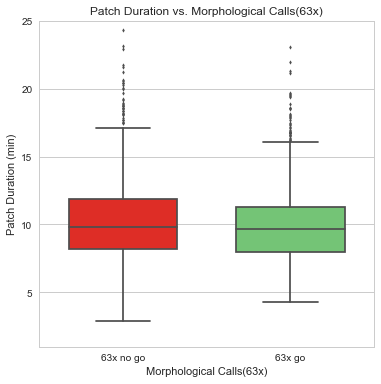

In [30]:
plt.subplots(figsize=(6,6)) #Has to before the plot to work

bp = sns.boxplot(x = 'morph', 
            y = 'patch_dur', 
            data = final_df,
            order = ['63x no go','63x go'],
            palette = ['#de2d26', '#74c476'],
            width = 0.65,
            saturation = 1,
            fliersize = 3)

bp.set(ylim=(1, 25))
bp.set_title('Patch Duration vs. Morphological Calls(63x)')
bp.set(xlabel = 'Morphological Calls(63x)', ylabel = 'Patch Duration (min)')

### Box Plot of Patch Duration vs Post Patch Outcomes

[Text(0,0.5,u'Patch Duration (min)'), Text(0.5,0,u'Post Patch Outcomes')]

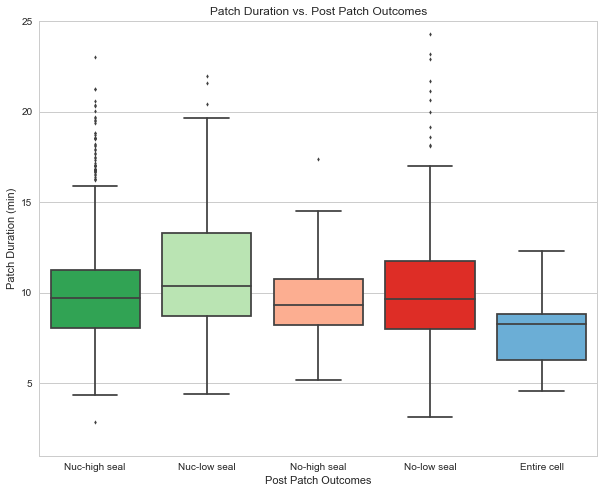

In [31]:
plt.subplots(figsize=(10,8)) #Has to before the plot to work

bp = sns.boxplot(x = 'post_patch', 
            y = 'patch_dur', 
            order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
            palette = ['#31a354', '#bae4b3', '#fcae91', '#de2d26', '#6baed6'],
            data = final_df,
            saturation = 1,
            fliersize = 3)

bp.set(ylim=(1, 25))

bp.set_title('Patch Duration vs. Post Patch Outcomes')
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')
#plt.savefig('Boxplot_PD_vs_PP')

### Box Plot of Patch Duration vs Morphological Calls per Post Post Outcomes

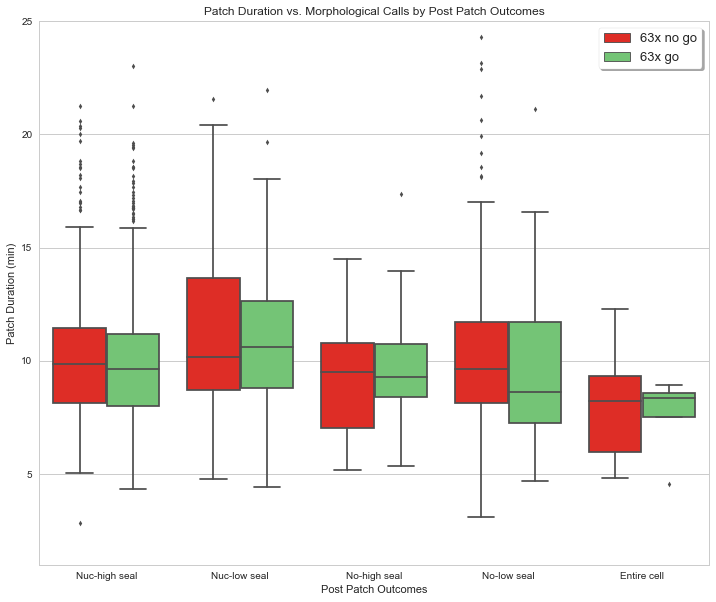

In [32]:
plt.subplots(figsize=(12,10)) #Has to be before the plot to work

bp = sns.boxplot(x = 'post_patch', 
            y = 'patch_dur', 
            hue = 'morph',
            order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
            hue_order = ['63x no go','63x go'],
            data = final_df,
            palette = ['#de2d26', '#74c476'],
            saturation = 1,
            fliersize = 4)

bp.legend(loc = 0, 
          #bbox_to_anchor = (0.95, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 13)
bp.set(ylim=(1, 25))

bp.set_title('Patch Duration vs. Morphological Calls by Post Patch Outcomes')
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')
plt.savefig('Boxplot_PD_vs_M_by_PP')

##### Info

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 170901 to 180306
Data columns (total 5 columns):
morph                     992 non-null category
anno.postPatch_label      992 non-null object
anno.endPipetteR_label    992 non-null float64
patch_dur                 976 non-null float64
post_patch                992 non-null category
dtypes: category(2), float64(2), object(1)
memory usage: 53.2+ KB


##### Factor Plot of Patch Duration vs Morphological Calls per Post Post Outcomes

Text(0.5,1,u'Patch Duration vs. Morphological Calls by Post Patch Outcomes')

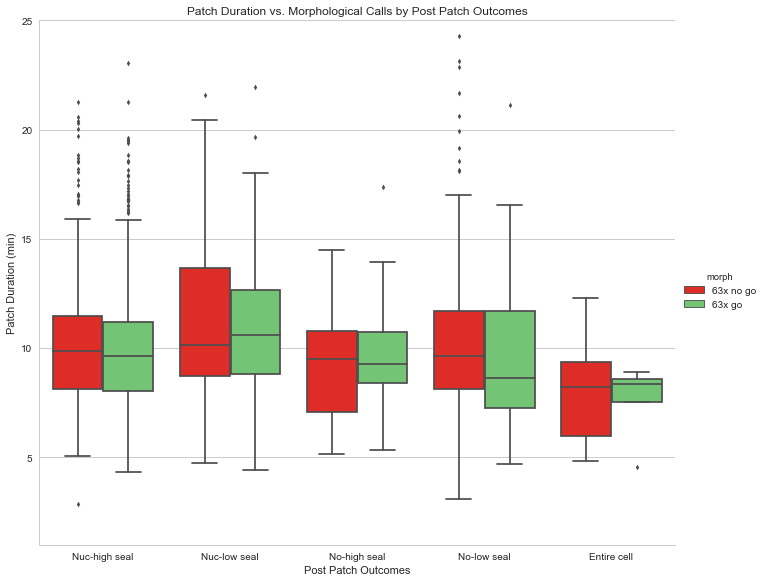

In [34]:
fp = sns.factorplot(
    kind = 'box',
    x = 'post_patch', 
    y = 'patch_dur', 
    hue = 'morph',
    order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
    hue_order = ['63x no go','63x go'],
    data = final_df,
    palette = ['#de2d26', '#74c476'],
    saturation = 1,
    fliersize = 4,
    size = 8,
    aspect = 1.2,
    legend_out = True,
    ci = 'sd')

fp.set(ylim=(1, 25))

fp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')
plt.title('Patch Duration vs. Morphological Calls by Post Patch Outcomes')

## Extra Plots

In [35]:
final_df = final_df.reset_index()

In [36]:
final_df.head()

,Date,morph,anno.postPatch_label,anno.endPipetteR_label,patch_dur,post_patch
0,170901,63x no go,Nucleated,0.0,11.316667,Nuc-high seal
1,170901,63x go,No-Seal,0.0,9.866667,No-low seal
2,170901,63x no go,No-Seal,0.0,11.600000,No-low seal
3,170901,63x go,Partial-Nucleus,0.0,12.200000,Nuc-low seal
4,170901,63x no go,No-Seal,0.0,10.100000,No-low seal


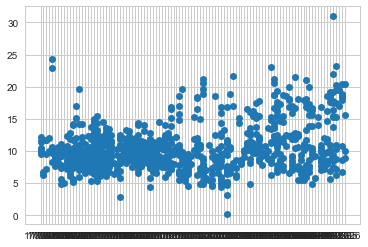

In [37]:
plt.plot_date(final_df['Date'], final_df['patch_dur'])

In [38]:
#Changing Date Format
final_df['Date'] = pd.to_datetime(final_df['Date'], format = "%y%m%d", errors = "coerce")

In [39]:
final_df.head()

,Date,morph,anno.postPatch_label,anno.endPipetteR_label,patch_dur,post_patch
0,2017-09-01,63x no go,Nucleated,0.0,11.316667,Nuc-high seal
1,2017-09-01,63x go,No-Seal,0.0,9.866667,No-low seal
2,2017-09-01,63x no go,No-Seal,0.0,11.600000,No-low seal
3,2017-09-01,63x go,Partial-Nucleus,0.0,12.200000,Nuc-low seal
4,2017-09-01,63x no go,No-Seal,0.0,10.100000,No-low seal


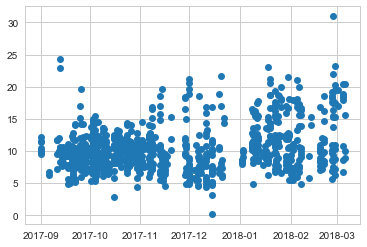

In [40]:
plt.plot_date(x = final_df['Date'], 
              y = final_df['patch_dur'])

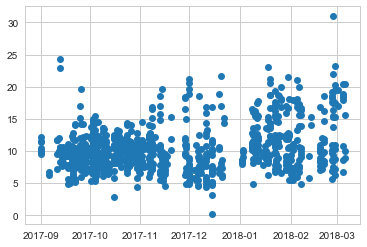

In [41]:
plt.plot_date(x = final_df['Date'], 
              y = final_df['patch_dur'])

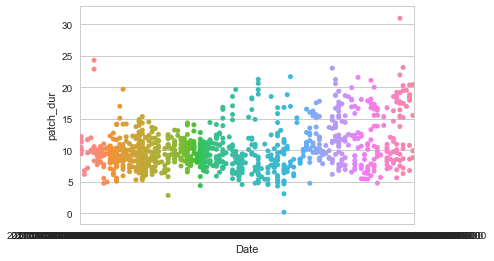

In [42]:
sns.stripplot(x = 'Date',
              y = 'patch_dur',
              data = final_df)